### Data as table

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Visualization

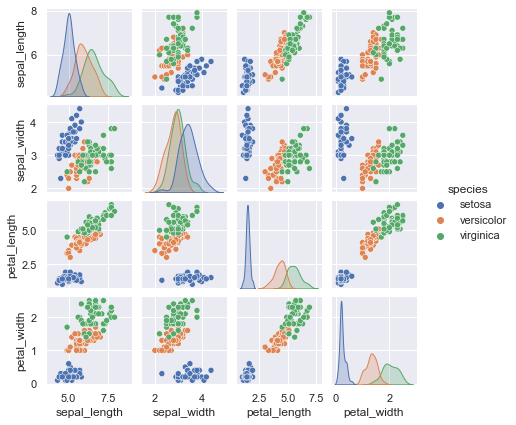

In [3]:
%matplotlib inline
import seaborn as sns; sns.set()
# sns.pairplot(iris, hue='species', size=1.5);  'size' parameter has been renamed to 'height'
sns.pairplot(iris, hue='species', height=1.5);

### Extracting features matrix and target array

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
y_iris = iris['species']
y_iris.shape

(150,)

### Scikit-Learn's Estimator API

#### Supervised learning example: Simple linear regression

In [6]:
import matplotlib.pyplot as plt
import numpy as np

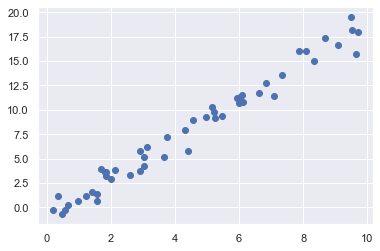

In [7]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

#### 1. Choose a class of model

In [8]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [10]:
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 3. Arrange data into a features matrix and target vector

In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to our data

In [12]:
model.fit(X, y)

LinearRegression()

In [13]:
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
model.coef_

array([1.9776566])

In [15]:
model.intercept_

-0.903310725531111

#### 5. Predict labels for unknown data

In [16]:
xfit = np.linspace(-1, 11)

In [17]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

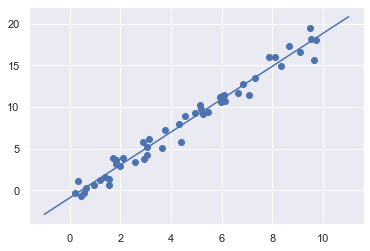

In [18]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

### Supervised learning example: Iris classification

In [19]:
# from sklearn.cross_validation import train_test_split -- No longer works

from sklearn.model_selection import train_test_split

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [21]:
# With data arranged, we can now predict the labels


from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. instantiate model
model.fit(Xtrain, ytrain)                   # 3. fit model to data
y_model = model.predict(Xtest)              # 4. predict on new data

In [22]:
# Finally, we can use accuracy_score utility to see the fraction of predicted lables that match their true value

from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

### Unsupervised learning example: Iris classification

In [23]:
from sklearn.decomposition import PCA  # 1. choose the model class
model = PCA(n_components=2)            # 2. instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

e:\virtual_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


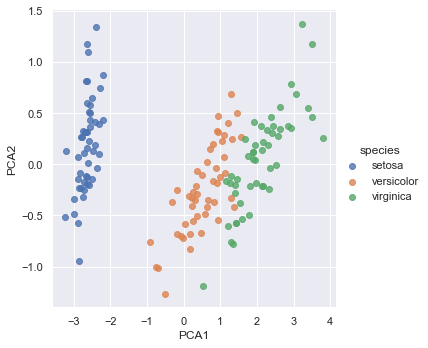

In [24]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning: Iris clustering

In [25]:
from sklearn import mixture
model = mixture.GaussianMixture(n_components=3, covariance_type='full')

# from sklearn.mixture import GMM                     # 1. Choose the model class
# model = GMM(n_components=3, covariance_type='full') # 2. instantiate the model w/ hyperparameters
model.fit(X_iris)                                     # 3. Fit to data, Notice y is not specified!
y_gmm = model.predict(X_iris)                         # 4. Determine cluster labels

e:\virtual_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


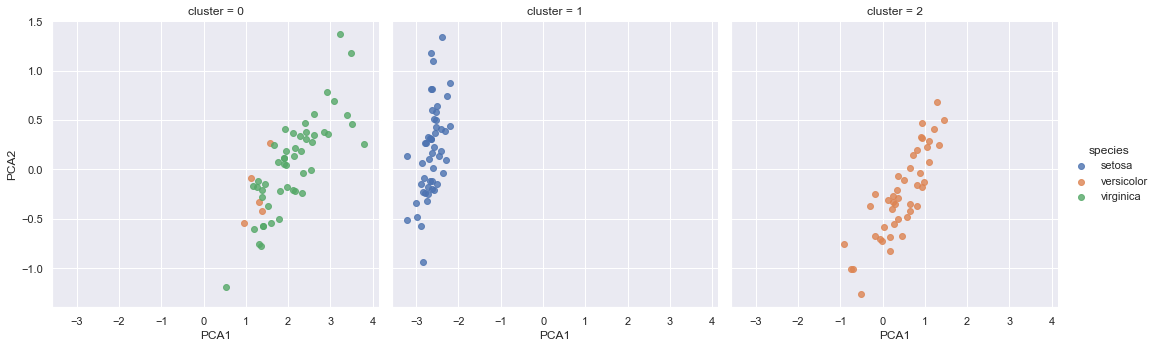

In [26]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False)

### Exploring Handwritten Digits

#### Loading and visualizing the digits data

In [27]:
from sklearn.datasets import load_digits

In [28]:
digits = load_digits()
digits.images.shape

(1797, 8, 8)

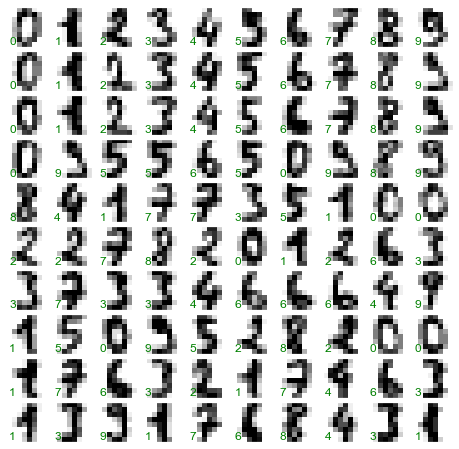

In [29]:
# Visualizing first 100 of these

import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')

In [30]:
X = digits.data
X.shape

(1797, 64)

In [31]:
y = digits.target
y.shape

(1797,)

#### Unsupervised learning: Dimensionality reduction

In [32]:
from sklearn.manifold import Isomap

In [33]:
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

e:\virtual_env\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
e:\virtual_env\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

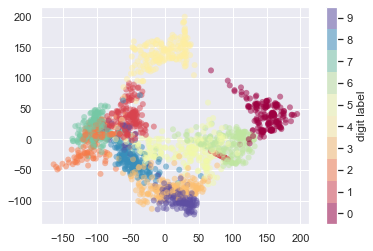

In [34]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

#### Classification on digits

In [35]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

Text(89.18, 0.5, 'true value')

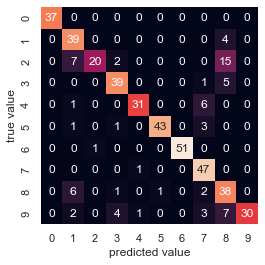

In [38]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

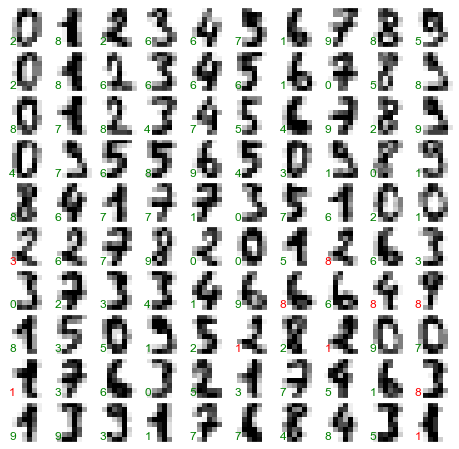

In [39]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')